# Importing the Libraries needed

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import re

## Loading the dataset

In [56]:
# We read in the aviation and the US State codes
df = pd.read_csv('./data/AviationData.csv',encoding='latin1')
us_codes = pd.read_csv('data/USState_Codes.csv')

C:\Users\Johny\AppData\Local\Temp\ipykernel_15276\377235868.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/AviationData.csv',encoding='latin1')


## Inspection of the dataset
We run the following commands to inspect what the dataframe contains

In [57]:
# Initial inspection of the dataset to check what it contains
print(df.info()) # Here we are checking the quick summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [58]:
print(df.describe()) # Getting a quick summary of the statistics

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75% 

In [59]:
print(df.head()) # Checking the first 5 lines in the dataframe

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

In [60]:
df.columns # Checking the column names

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Features of our dataset 
- Our data comprises of 88889 rows and 30 columns.
- The dataset is of mixed dtypes such as datetime64[ns](1), float64(7), int32(1), object(24)
- Quite a number of columns have missing values denoted either as nan or as None


We will try and find the total number of missing values per column and compute the percentages for easy viewing.

In [61]:
#Percentage of missing values in the dataframe
percentage_missing =  round(df.isnull().sum() * 100 / len(df), 2)
#sorting the percentage of missing values in descending order
sorted_percentage_missing = percentage_missing.sort_values(ascending=False)
#preview the sorted dataframe
sorted_percentage_missing

Schedule                  85.85
Air.carrier               81.27
FAR.Description           63.97
Aircraft.Category         63.68
Longitude                 61.33
Latitude                  61.32
Airport.Code              43.60
Airport.Name              40.71
Broad.phase.of.flight     30.56
Publication.Date          15.49
Total.Serious.Injuries    14.07
Total.Minor.Injuries      13.42
Total.Fatal.Injuries      12.83
Engine.Type                7.98
Report.Status              7.18
Purpose.of.flight          6.97
Number.of.Engines          6.84
Total.Uninjured            6.65
Weather.Condition          5.05
Aircraft.damage            3.59
Registration.Number        1.55
Injury.Severity            1.12
Country                    0.25
Amateur.Built              0.11
Model                      0.10
Make                       0.07
Location                   0.06
Investigation.Type         0.00
Event.Date                 0.00
Accident.Number            0.00
Event.Id                   0.00
dtype: f

## Plotting the missing values
We plotted the missing values so that we could view them

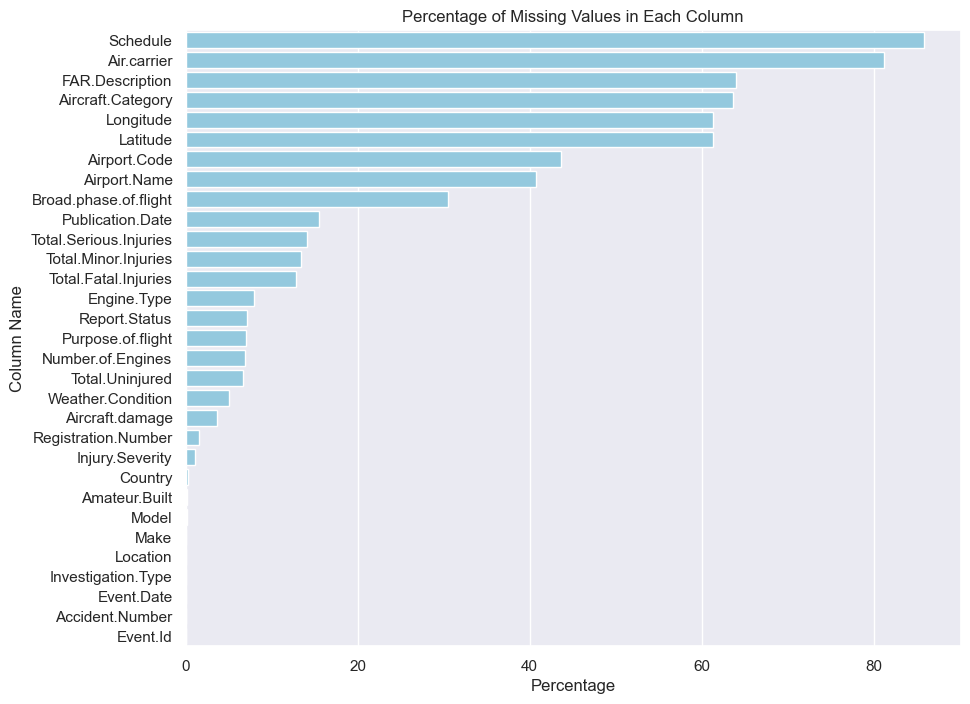

In [62]:
#Plotting the percentage of missing values in each column
#setting the style of the plot
sns.set_style('darkgrid')
#setting the size of the plot
fig, ax = plt.subplots(figsize=(10, 8))

#plotting the percentage of missing values in each column a horizontal bar plot
sns.barplot(x=sorted_percentage_missing.values, y=sorted_percentage_missing.index, color='skyblue', orient='h')
#setting the title and axis labels of the plot
ax.set_title('Percentage of Missing Values in Each Column')
ax.set_ylabel('Column Name')
ax.set_xlabel('Percentage');

# Handling the missing values
We will drop the columns with missing values amounting to 60% of the total dataset

In [63]:
# Handle missing values
# We will fill the columns with either Unknown
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown')

df['Make'] = df['Make'].fillna('Unknown')
df['Make'] = df['Make'].map(lambda x: str(x).title())
df['Model'] = df['Model'].fillna('Unknown')
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode().iloc[0]) # I replaced it with the mode instead of the mean because the data is categorical
df['Engine.Type'] = df['Engine.Type'].fillna('Unknown').replace({'NONE':'Unknown'})

 # Convert latitude/longitude to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Convert Event date to a date_time object
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Fill the nones with Unknown
df['Airport.Name'] = df['Airport.Name'].fillna('Unkown')

# Strip white spaces in the airport names and convert them to titles
df['Airport.Name'] = df['Airport.Name'].map(lambda x: x.strip().title())

# Create year column using the year from the event date
df['Year'] = df['Event.Date'].dt.year
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')

# Fill in the missing values in the injury columns
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries','Total.Uninjured']
df[injury_cols]=df[injury_cols].fillna(0)



In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                11986 non-null  float64       
 7   Longitude               11974 non-null  float64       
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            88889 non-null  object        
 10  Injury.Severity         88889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       88889 non-null  object

## Filtering te data

Since we are looking at flight risk operations in the US. We need to filter our data and match the state codes to their respective names in the US

In [65]:
# Convert the US cities to States/territories
df_us = df[df['Country'] == 'United States']

# converting the states to a dictionary for reading in the states
states = dict(zip(us_codes['Abbreviation'],us_codes['US_State']))

# Function to clean the location column and just get the US territories converted to US States
def clean_location(loc):
    loc = str(loc)  # Ensuring that the location is a string
    match = re.match(r'^(.*?),\s*([A-Z]{2})$', loc)  # Extracts the prefix and suffix
    if match:
        city, code = match.groups()  # Split the location into city and state code
        if code in states:  # Check if the suffix is a valid state abbreviation
            return states[code]  # Return only the full state name
        else:
            return city.strip()  # If suffix is invalid, return only the city (prefix)
    return loc  # Return the location as-is if no match

In [66]:
# Apply the function to clean the 'Location' column 
df['US_territories'] = df['Location'].apply(clean_location)


In [67]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,US_territories
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,Unkown,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,Idaho
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,Unkown,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,California
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,Unkown,...,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,1974,Virginia
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,Unkown,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,California
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,Unkown,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,Ohio


In [68]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Year', 'US_territories'],
      dtype='object')

***Here we remove all unnecessary columns and also the columns with NANs greater than 60%.***
The reason we are choosing these columns is because;
1. We want to determine which aircraft brands are historically associated with the lowest accident frequencies and better safety records.
2. To quantify the number of accidents per aircraft, helping to identify low-risk models based on historical data.
3. To evaluate the relationship between engine configuration and fatalities, and identify engine types that demonstrate better safety performance.
4. To understand when accidents most commonly occur (e.g., Takeoff, Landing, Cruise), providing operational insights that can guide risk management strategies during flight operations.

In [69]:
# Filter relevant columns
cols = ['Event.Id', 'Investigation.Type', 'Aircraft.Category', 'Make', 'Model','Airport.Name',
        'Number.of.Engines', 'Engine.Type', 'Year', 'Injury.Severity','US_territories',
        'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Broad.phase.of.flight',
        'Total.Minor.Injuries','Total.Uninjured']

df_clean = df[cols].copy() # copying the filtered data to reduce memory consumption

df_clean.to_csv("./data/df_clean.csv") # Writing/ exporting the cleaned dataframe as a csv file

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                11986 non-null  float64       
 7   Longitude               11974 non-null  float64       
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            88889 non-null  object        
 10  Injury.Severity         88889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       88889 non-null  object

# Analysis
Component	Weight	Meanings for calculating the weighted safety metrics

- Average fatalities	0.4	Heaviest weight — deadlier = riskier
- Average serious injuries	0.3	Bad but less severe than fatalities
- Time since last accident	0.2	Newer = higher risk (because (2023 - year) is smaller)
- Total number of accidents	0.1	Minor weight — high count = slightly riskier

In [71]:
# Calculate key safety metrics
safety_metrics = df_clean.groupby(['Make', 'Model']).agg(
    total_accidents=('Event.Id', 'count'),
    avg_fatalities=('Total.Fatal.Injuries', 'mean'),
    injury_rate=('Total.Serious.Injuries', 'mean'),
    engine_type=('Engine.Type', pd.Series.mode),
    category=('Aircraft.Category', pd.Series.mode),
    recent_accident_year=('Year', 'max'),
    common_phase=('Broad.phase.of.flight', pd.Series.mode),
    total_engines=('Number.of.Engines', 'mean')
).reset_index()

# Filter for sufficient data points (minimum 10 accidents)
safety_metrics = safety_metrics[safety_metrics['total_accidents'] >= 10]

# Calculate weighted risk score using customized weights as needed)
safety_metrics['risk_score'] = (
    (safety_metrics['avg_fatalities'] * 0.4) +
    (safety_metrics['injury_rate'] * 0.3) +
    ((2023 - safety_metrics['recent_accident_year']) * 0.2) +  
    (safety_metrics['total_accidents'] * 0.1)
)

# Ranking all the aircraft
safety_metrics['safety_rank'] = safety_metrics['risk_score'].rank(ascending=True)

# Get top 10 safest aircraft
safest_aircraft = safety_metrics.sort_values('safety_rank')[
    ['Make', 'Model', 'engine_type', 'category', 'common_phase',
     'total_accidents', 'avg_fatalities', 'safety_rank']
].head(10)

print("Top 10 Safest Aircraft Models:")
print(safest_aircraft)

Top 10 Safest Aircraft Models:
                          Make        Model    engine_type  \
11468                    Maule     M-7-235B  Reciprocating   
15809  Schweizer Aircraft Corp       G-164B     Turbo Prop   
15001   Rockwell International          114  Reciprocating   
6254   Czech Sport Aircraft As  PIPER SPORT  Reciprocating   
12755           North American        SNJ-6  Reciprocating   
980           Airbus Industrie     A320-232      Turbo Fan   
3434                    Boeing      757-251      Turbo Fan   
17671        Vans Aircraft Inc        RV-12  Reciprocating   
831                     Airbus         A300        Unknown   
7700    Extra Flugzeugbau Gmbh     EA 300/L  Reciprocating   

                  category                          common_phase  \
11468              Unknown                               Landing   
15809             Airplane                               Unknown   
15001             Airplane                               Unknown   
6254          

### Ranking the Safest Aircraft models based on the safety weights calculated

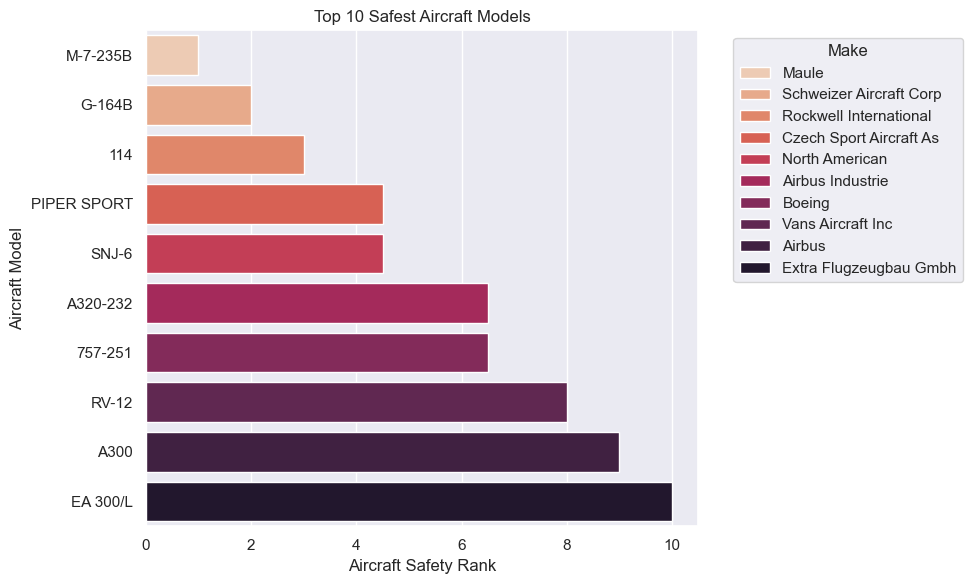

In [72]:
# Set the style
sns.set(style="darkgrid")

# Sort by safety rank (just to be sure)
plot_data = safest_aircraft.sort_values('safety_rank')

# Create a horizontal barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='safety_rank',
    y='Model',
    data=plot_data,
    hue='Make',
    dodge=False,
    palette='rocket_r'
)

# Adding labels and title
plt.xlabel('Aircraft Safety Rank')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Safest Aircraft Models')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Accident trends over time

In [73]:
# Looking at the trends of the Model accidents over time
list_safest_aircraft = safest_aircraft["Make"] # Creating a pd series of just the top 10 safest aircraft makes
df_top_10 = df_clean[df_clean['Make'].isin(list_safest_aircraft)] # Filtering the top 10 makes from the cleaned dataset


make_yr_df = df_top_10.groupby(['Year','Make'])['Event.Id'].count().reset_index()
make_yr_df.rename(columns={'Event.Id':'Accident count'},inplace=True) # Renaming the Event.Id column in place
make_yr_df = make_yr_df.sort_values(by='Accident count', ascending=False) # Sorting the accident count values in descending order
make_yr_df

,Year,Make,Accident count
201,2018,Boeing,107
193,2017,Boeing,100
185,2016,Boeing,99
229,2022,Boeing,97
143,2011,Boeing,93
...,...,...,...
205,2018,Rockwell International,1
177,2015,Extra Flugzeugbau Gmbh,1
207,2018,Vans Aircraft Inc,1
72,2000,Airbus,1


### Plotting the figure

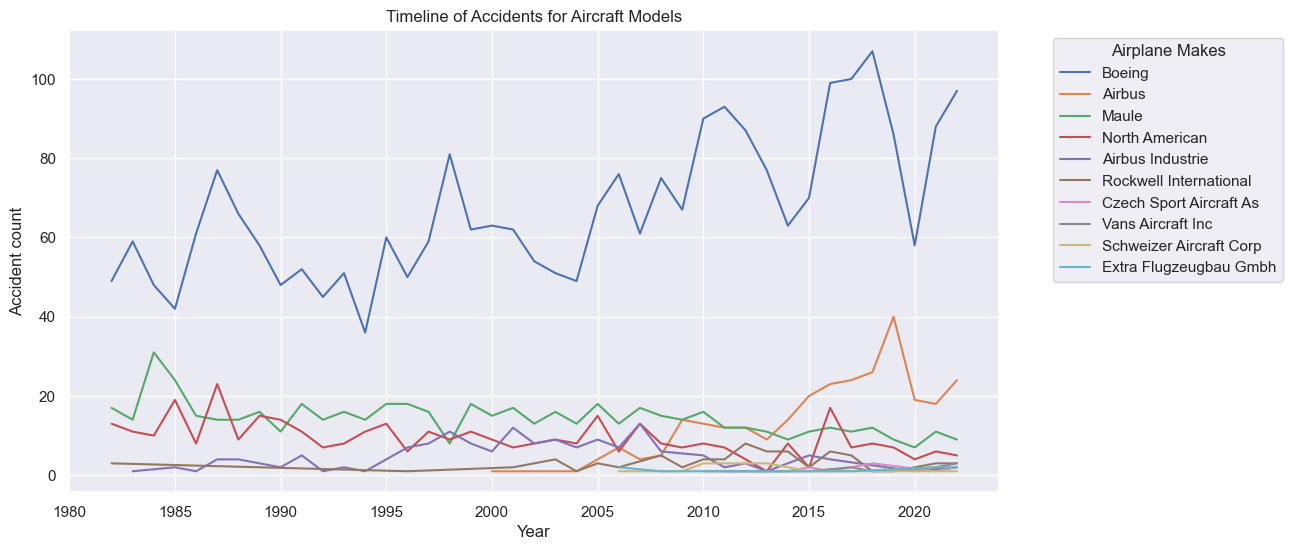

In [74]:
plt.figure(figsize=(12, 6)) # plots the figure
sns.lineplot(data=make_yr_df, x='Year', y='Accident count', hue='Make', legend=True) # Draws the line plot
plt.title('Timeline of Accidents for Aircraft Models') #labels the title
plt.xlabel('Year') # Labels the x axis with year
plt.legend(title='Airplane Makes',bbox_to_anchor=(1.05, 1), loc='upper left') #creates a legend outside on the upper left
plt.ylabel('Accident count')
plt.show()

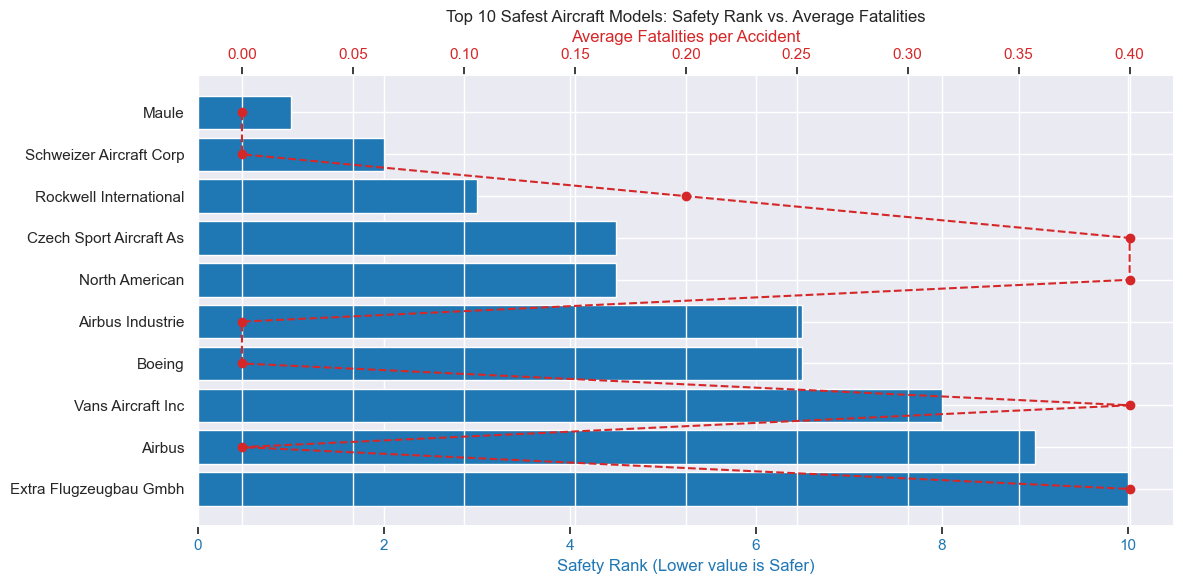

In [75]:

# Sort data for consistent plotting
plot_data = safest_aircraft.sort_values('safety_rank')

# Set figure size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Set up colors
color1 = 'tab:blue'
color2 = 'tab:red'

# Bar plot for Safety Rank
ax1.barh(plot_data['Make'], plot_data['safety_rank'], color=color1, label='Safety Rank')
ax1.set_xlabel('Safety Rank (Lower value is Safer)', color=color1)
ax1.tick_params(axis='x', labelcolor=color1)
ax1.invert_yaxis()  # So the safest (rank 1) is on top

# Create second axis sharing the same y-axis
ax2 = ax1.twiny() # Causes the ax2 to share the same x and y axes
ax2.plot(plot_data['avg_fatalities'], plot_data['Make'], color=color2, marker='o', label='Avg Fatalities', linestyle='--')
ax2.set_xlabel('Average Fatalities per Accident', color=color2)
ax2.tick_params(axis='x', labelcolor=color2)

# Title and layout
plt.title('Top 10 Safest Aircraft Models: Safety Rank vs. Average Fatalities')
fig.tight_layout()
plt.show()


In [76]:
# Clean Airport Name column: strip extra spaces and replace inconsistent characters
df_clean['Airport.Name'] = df_clean['Airport.Name'].str.strip().str.replace(r'[^\w\s]', '', regex=True)

# Check for duplicates
df_clean = df_clean.drop_duplicates(subset=['Airport.Name', 'Broad.phase.of.flight'])


# Check for unique broad phases
print(df_clean['Broad.phase.of.flight'].unique())


['Cruise' 'Unknown' 'Approach' 'Climb' 'Takeoff' 'Landing' 'Taxi'
 'Descent' 'Maneuvering' 'Standing' 'Go-around' 'Other']


### Finding the leading causes of aircraft accidents

In [77]:
# Group by 'Broad.phase.of.flight' and count accidents (Event.Id)
cause_accidents = df_clean.groupby('Broad.phase.of.flight')['Event.Id'].count().reset_index()

# Rename 'Event.Id' to 'Accident Count'
cause_accidents.rename(columns={'Event.Id': 'Accident Count'}, inplace=True)

# Sort by accident count to identify the leading causes
cause_accidents_sorted = cause_accidents.sort_values(by='Accident Count', ascending=False)

# Show the top leading causes
top_10_accident_causes = cause_accidents_sorted  # Top 10 leading causes removed the unknowns
top_10_accident_causes


,Broad.phase.of.flight,Accident Count
11,Unknown,8748
5,Landing,7731
9,Takeoff,6260
0,Approach,3782
2,Cruise,1796
6,Maneuvering,1586
10,Taxi,1261
4,Go-around,1051
1,Climb,747
8,Standing,696


### plotting the figure

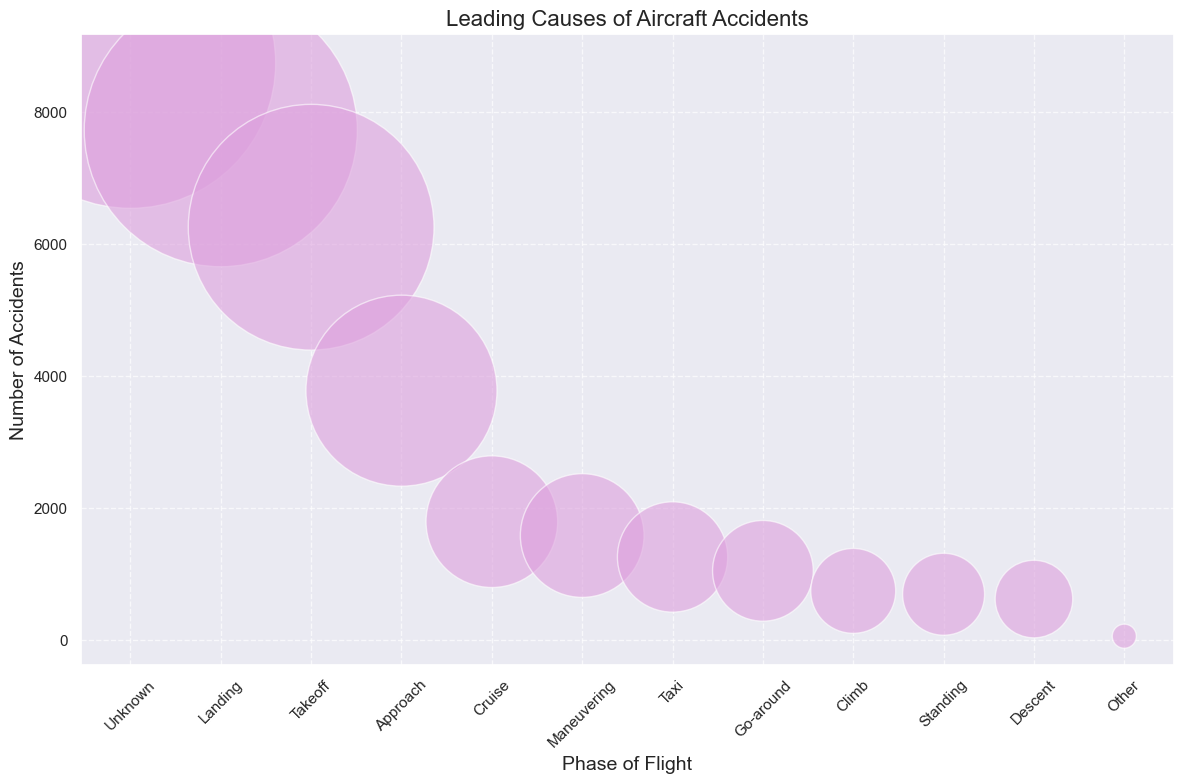

In [78]:
plt.figure(figsize=(12, 8))

# Bubble plot
plt.scatter(
    x=top_10_accident_causes['Broad.phase.of.flight'], 
    y=top_10_accident_causes['Accident Count'],
    s=top_10_accident_causes['Accident Count'] * 5,  # Scale bubble size (you can adjust multiplier)
    alpha=0.6,
    edgecolors='w',
    color='plum'
)

plt.title('Leading Causes of Aircraft Accidents', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Getting the Accident frequency by flight phase

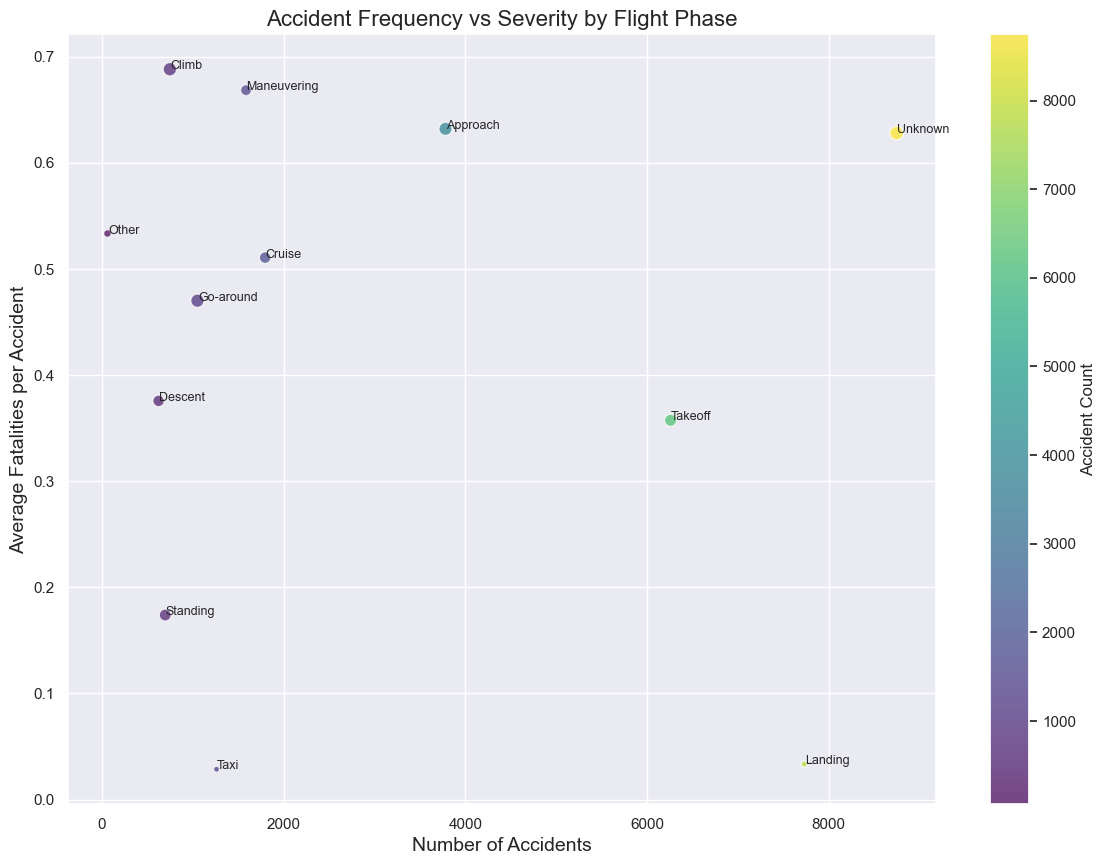

In [79]:
# Group the dataset by 'Broad.phase.of.flight' and calculate:
# - Average fatalities per accident
# - Average serious injuries per accident
# - Total number of accidents
severity_by_phase = df_clean.groupby('Broad.phase.of.flight').agg(
    avg_fatalities=('Total.Fatal.Injuries', 'mean'),
    avg_serious_injuries=('Total.Serious.Injuries', 'mean'),
    accident_count=('Event.Id', 'count')
).reset_index()

# Now plot
plt.figure(figsize=(14,10))

# Creating a Scatter plot (Bubble plot)
scatter = plt.scatter(
    x=severity_by_phase['accident_count'], # data on the x axis
    y=severity_by_phase['avg_fatalities'], # data on the y axis
    s=severity_by_phase['avg_serious_injuries']*300,  # Scale bubble sizes
    c=severity_by_phase['accident_count'],             # Color by accident count
    cmap='viridis',
    alpha=0.7,
    edgecolors="w"
)

# Add flight phase labels to each bubble
for i in range(severity_by_phase.shape[0]):
    plt.text(
        severity_by_phase['accident_count'][i]+5,   # Little nudge to right
        severity_by_phase['avg_fatalities'][i],
        severity_by_phase['Broad.phase.of.flight'][i],
        fontsize=9
    )

# Adds Titles and axis labels
plt.title('Accident Frequency vs Severity by Flight Phase', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Average Fatalities per Accident', fontsize=14)
plt.colorbar(label='Accident Count')
plt.grid(True)
plt.show()


### Looking at the fatalities and engine types and numbers
This will help us tell if multi-engine type planes are better than mono-engine types

In [80]:
# First, filter out aircraft with 0 engines
df_engines = df_clean[df_clean['Number.of.Engines'] > 0] # Filtered out the planes with zero engines in the data

# Group by Number of Engines and Engine Type and then reindex the df
engine_group = df_engines.groupby(['Number.of.Engines', 'Engine.Type']).agg(
    total_accidents=('Event.Id', 'count'),
    total_fatalities=('Total.Fatal.Injuries', 'sum')
).reset_index()

# Calculate fatality rate: fatalities per accident
engine_group['fatality_rate'] = engine_group['total_fatalities'] / engine_group['total_accidents']

# Sort by highest fatality rate
engine_group = engine_group.sort_values(by='fatality_rate', ascending=False)

# Display
print(engine_group)



    Number.of.Engines    Engine.Type  total_accidents  total_fatalities  \
20                4.0      Turbo Jet               16             268.0   
16                3.0        Unknown                8              92.0   
2                 1.0      Turbo Fan               51             274.0   
19                4.0      Turbo Fan               98             498.0   
21                4.0     Turbo Prop               23              98.0   
3                 1.0      Turbo Jet               47             152.0   
12                2.0        Unknown              205             629.0   
14                3.0      Turbo Fan              178             432.0   
8                 2.0      Turbo Fan              739             945.0   
6                 1.0        Unknown             1099            1106.0   
10                2.0     Turbo Prop              964             857.0   
9                 2.0      Turbo Jet              242             196.0   
11                2.0    

### Plotting the fatality by the number of Engine types

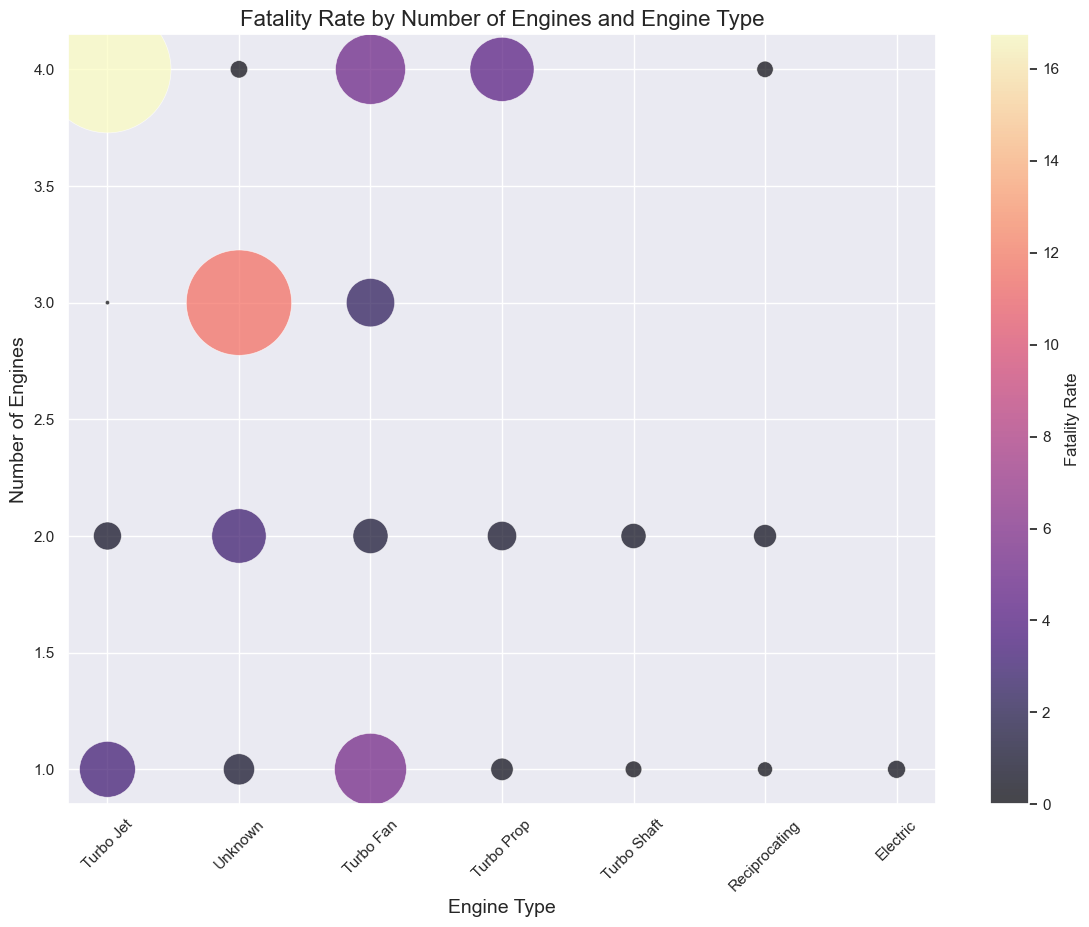

In [81]:
# Bubble plot
plt.figure(figsize=(14,10))
plt.scatter(
    x=engine_group['Engine.Type'],
    y=engine_group['Number.of.Engines'],
    s=engine_group['fatality_rate']*500,  # Bubble size scaled by fatality rate
    c=engine_group['fatality_rate'],       # Color also based on fatality rate
    cmap='magma',                         # You can use 'viridis', 'coolwarm', 'magma' too
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)

plt.title('Fatality Rate by Number of Engines and Engine Type', fontsize=16)
plt.xlabel('Engine Type', fontsize=14)
plt.ylabel('Number of Engines', fontsize=14)
plt.xticks(rotation=45)
plt.colorbar(label='Fatality Rate')
plt.grid(True)
plt.show()
